In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [ ]:
#implement Kmeans
def Kmeans(centroids_list, K ,data):
    cost_list = []
    for rounds in range(0,20):
        #initializations
        new_clusters_list=[]
        k_cluster=[]
        total_cost = 0
        cluster_centroid = []
        #find the closest centroid for each xi
        for i in range(0,500):
            distance_list = []
            for centroid in centroids_list:
                distance = np.sum((data[i]-centroid)**2)
                distance_list.append(distance)
                nearest_cluster = min(distance_list)
                new_cluster = distance_list.index(nearest_cluster)
            new_clusters_list.append(new_cluster)
        #new K clusters
        
        for index in range(0,K):
            cluster = data[np.array(new_clusters_list)==index,:]
            k_cluster.append(cluster)
            
        #new Centroids
        for item in range(0,K):
            cluster_mean = np.average(k_cluster[item],axis=0)
            cluster_centroid.append(cluster_mean)
            
            cost = np.sum((k_cluster[item]-centroids_list[item])**2)
            total_cost = total_cost + cost
            

        cost_list.append(total_cost)
        centroids_list = cluster_centroid
    return cost_list, k_cluster
        


In [ ]:
#generate 500 observations with mixing weights
start = np.random.randint(0,501,size=5)
data1 = np.random.multivariate_normal(np.array([0,0]),np.matrix([[1,0],[0,1]]),500)
data2 = np.random.multivariate_normal(np.array([3,0]),np.matrix([[1,0],[0,1]]),500)
data3 = np.random.multivariate_normal(np.array([0,3]),np.matrix([[1,0],[0,1]]),500)
data_pi = np.random.choice(range(3),500,p=[0.2,0.5,0.3])
dataset = np.concatenate((data1[data_pi==0,:],
                       data2[data_pi==1,:],
                       data3[data_pi==2,:] ))

In [ ]:

K_2 = (dataset[start[0]],dataset[start[1]])
K_3 = (dataset[start[0]],dataset[start[1]],dataset[start[2]])
K_4 = (dataset[start[0]],dataset[start[1]],dataset[start[2]],dataset[start[3]])
K_5 = (dataset[start[0]],dataset[start[1]],dataset[start[2]],dataset[start[3]],dataset[start[4]])


In [ ]:
cost_2, Kcluster_2 = Kmeans(K_2,2,dataset)
cost_3, Kcluster_3 = Kmeans(K_3,3,dataset)
cost_4, Kcluster_4 = Kmeans(K_4,4,dataset)
cost_5, Kcluster_5 = Kmeans(K_5,5,dataset)
plt.figure(figsize=(6,6))
plt.xticks(np.arange(1,21))
plt.xlabel('i_th iteration')
plt.ylabel('cost')
plt.plot(np.arange(1,21),cost_2,label='K=2')
plt.plot(np.arange(1,21),cost_3,label='K=3')
plt.plot(np.arange(1,21),cost_4,label='K=3')
plt.plot(np.arange(1,21),cost_5,label='K=3')
plt.legend()

In [ ]:
cluster1=pd.DataFrame(Kcluster_3[0])
cluster2=pd.DataFrame(Kcluster_3[1])
cluster3=pd.DataFrame(Kcluster_3[2])
x1,y1 = cluster1[0].tolist(),cluster1[1].tolist()
x2,y2 = cluster2[0].tolist(),cluster2[1].tolist()
x3,y3 = cluster3[0].tolist(),cluster3[1].tolist()
plt.scatter(x1,y1,label='cluster1')
plt.scatter(x2,y2,label='cluster2')
plt.scatter(x3,y3,label='cluster3')
plt.legend()



In [ ]:
cluster1=pd.DataFrame(Kcluster_5[0])
cluster2=pd.DataFrame(Kcluster_5[1])
cluster3=pd.DataFrame(Kcluster_5[2])
cluster4=pd.DataFrame(Kcluster_5[3])
cluster5=pd.DataFrame(Kcluster_5[4])
x1,y1 = cluster1[0].tolist(),cluster1[1].tolist()
x2,y2 = cluster2[0].tolist(),cluster2[1].tolist()
x3,y3 = cluster3[0].tolist(),cluster3[1].tolist()
x4,y4 = cluster4[0].tolist(),cluster4[1].tolist()
x5,y5 = cluster5[0].tolist(),cluster5[1].tolist()
plt.scatter(x1,y1,label='cluster1')
plt.scatter(x2,y2,label='cluster2')
plt.scatter(x3,y3,label='cluster3')
plt.scatter(x4,y4,label='cluster4')
plt.scatter(x5,y5,label='cluster5')
plt.legend()

In [2]:
#Q2
X_train = pd.read_csv('Prob2_Xtrain.csv', header=None)
X_test = pd.read_csv('Prob2_Xtest.csv', header=None)
y_train = pd.read_csv('Prob2_ytrain.csv', header=None)
y_test = pd.read_csv('Prob2_ytest.csv', header=None)
#combine train data and sperate spam and non-spam
total_train = pd.concat([X_train,y_train],axis=1)
train_1 = total_train[total_train.iloc[:,-1]==1]
train_0 = total_train[total_train.iloc[:,-1]==0]
#split the X and y
X_train_1 = train_1.iloc[:,0:10]
X_train_0 = train_0.iloc[:,0:10]
y_train_1 = train_1.iloc[:,-1]
y_train_0 = train_0.iloc[:,-1]

In [3]:
def EM(K,data):
    
    #initialization
    empirical_cov = np.array(K*[np.cov(data.transpose())])
    nk_shape = data.shape[0]
    mu = np.random.multivariate_normal(np.array(data.describe().loc['mean',:]),empirical_cov[0],K)
    pi = np.ones(K)*np.array(1/K)
   
    
    
    #E Step
    
    objective_function = []
    for j in range(0,30):
        phi = [0]*K
        nk = np.zeros(K)
        pin = 0
        for j in range(0, K):
            pin += pi[j]*multivariate_normal.pdf(data,mu[j],empirical_cov[j],allow_singular=True)
        for j in range(0, K): 
            phi[j] = pi[j]*multivariate_normal.pdf(data,mu[j],empirical_cov[j], allow_singular=True)/pin
        
        #M Step
        for j in range(0,K):
            nk[j] = np.sum(phi[j])
            pi[j] = nk[j]/nk_shape
        
         #update
        for j in range(0,K):
            mu[j] = (1/nk[j])*np.matmul(np.matrix(phi[j].reshape(1,-1)), np.matrix(data))
        empirical_cov[j] = np.matmul(np.multiply(phi[j].reshape(-1,1),(np.array(data)-mu[j])).transpose(),(np.array(data)-mu[j]))/nk[j]

        objective_function.append(np.sum(np.log(pin)))
    
    return objective_function, pi, mu, empirical_cov


In [4]:
def plottingGMM(data, K):
    plt.figure(figsize=(8,6))
    rounds=0
    x_axis = np.arange(5,31)
    obj_k = []
    pi_k = []
    mu_k = []
    cov_k = []
    for i in range(0, 10):
        objective_function, pi, mu, empirical_cov = EM(K, data)
        obj_k.append(objective_function)
        pi_k.append(pi)
        mu_k.append(mu)
        cov_k.append(empirical_cov)

    for i in obj_k:
        i = i[4:]
        plt.plot(x_axis, i, label="round"+str(rounds))
        rounds+=1
        plt.legend()
        plt.xlabel('iterations')
        plt.ylabel('objective function')
    return obj_k, pi_k, mu_k,cov_k
    

Text(0.5, 1.0, 'class1')

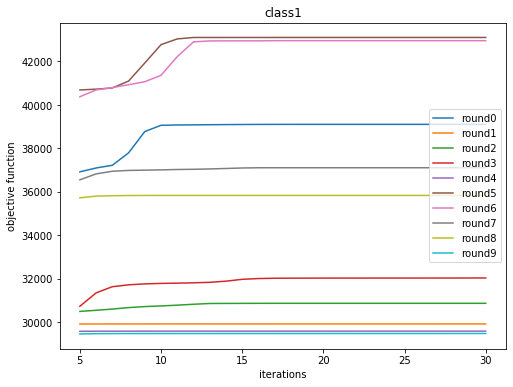

In [5]:
#class 1
obj_1, pi_1, mu_1,cov_1 = plottingGMM(X_train_1, 3)
plt.title("class1")

Text(0.5, 1.0, 'class0')

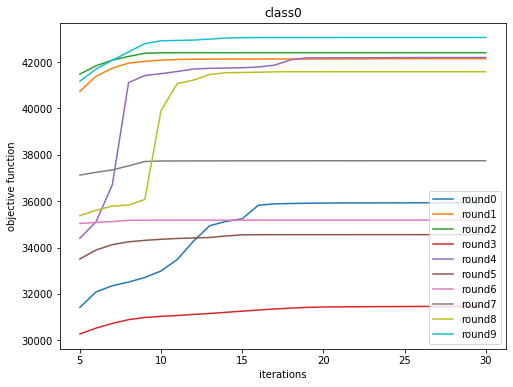

In [6]:
#class 0
obj_0, pi_0, mu_0,cov_0 = plottingGMM(X_train_0, 3)
plt.title("class0")

In [7]:
#b
def best_objective_index(obj_k):
    obj_lst = []
    n = 0
    largest=0
    for i in obj_k:
        obj_lst.append(i[-1])
        largest= max(obj_lst)
        index_lst = [n for n, m in enumerate(obj_lst) if m == largest]
        best_index = index_lst[0]
    return best_index     
def GMM_val(data, K):
    obj_k = []
    pi_k = []
    mu_k = []
    cov_k = []
    for i in range(0, 10):
        objective_function, pi, mu, empirical_cov = EM(K, data)
        obj_k.append(objective_function)
        pi_k.append(pi)
        mu_k.append(mu)
        cov_k.append(empirical_cov)
    return obj_k, pi_k, mu_k,cov_k
#best values
obj_0, pi_0, mu_0,cov_0 = GMM_val(X_train_0, 3)
obj_1, pi_1, mu_1,cov_1 = GMM_val(X_train_1, 3)
index_0 = best_objective_index(obj_0) 
index_1 = best_objective_index(obj_1)
best_pi_0 = pi_0[index_0]
best_mu_0 = mu_0[index_0]
best_cov_0 = cov_0[index_0]
best_pi_1 = pi_1[index_1]
best_mu_1 = mu_1[index_1]
best_cov_1 = cov_1[index_1]

In [21]:
def Bayes_GMM(data, K, best_pi_1, best_mu_1, best_cov_1, best_pi_0, best_mu_0, best_cov_0, compare_list):
    class0 = 0
    class1 = 0
    prediction = []
    TruePositive = 0
    FalsePositive = 0
    TrueNegative = 0
    FalseNegative = 0
    
    for i in range(0,K):
        class0 = best_pi_0[i]*multivariate_normal.pdf(data,best_mu_0[i],best_cov_0[i],allow_singular=True)+class0
    class0 = class0.tolist()
    for i in range(0,K):
        class1 += best_pi_1[i]*multivariate_normal.pdf(data,best_mu_1[i],best_cov_1[i],allow_singular=True)+class1
    class1 = class1.tolist() 

    for i in range(0, len(class1)):
        if class1[i]>=class0[i]:
            prediction.append(1)
        else:
            prediction.append(0)

    for i in range(0,len(compare_list)):
        if prediction[i]==1 and compare_list[i]==1:
            TruePositive += 1
        elif prediction[i]==0 and compare_list[i]==1:
            FalseNegative += 1
        elif prediction[i]==1 and compare_list[i]==0:
            FalsePositive += 1
        elif prediction[i]==0 and compare_list[i]==0:
            TrueNegative += 1
            
    matrix = [('FalseNegative:'+str(FalseNegative), 'TrueNegative:'+str(TrueNegative)),('TruePostive:'+str(TruePositive), 'FalseNegative:'+str(FalsePositive))]
    df = pd.DataFrame(matrix)
    df = df.rename({0: 'Truelist +', 1: 'Truelist -'}, axis='columns')
    df = df.rename({0: 'Predictitonlist -', 1: 'Predictionlist +'}, axis='index')
    accuracy = (TruePositive+TrueNegative)/(TruePositive+TrueNegative+FalsePositive+FalseNegative)
    display(df)
    print('The Accuracy is:'+ str(accuracy))

In [22]:
Bayes_GMM(X_test, 3, best_pi_1, best_mu_1, best_cov_1, best_pi_0, best_mu_0, best_cov_0,y_test.iloc[:,0].tolist())

,Truelist +,Truelist -
Predictitonlist -,FalseNegative:7,TrueNegative:199
Predictionlist +,TruePostive:175,FalseNegative:79


The Accuracy is:0.8130434782608695


In [23]:
obj_0, pi_0, mu_0,cov_0 = GMM_val(X_train_0, 1)
obj_1, pi_1, mu_1,cov_1 = GMM_val(X_train_1, 1)
index_0 = best_objective_index(obj_0) 
index_1 = best_objective_index(obj_1)
best_pi_0 = pi_0[index_0]
best_mu_0 = mu_0[index_0]
best_cov_0 = cov_0[index_0]
best_pi_1 = pi_1[index_1]
best_mu_1 = mu_1[index_1]
best_cov_1 = cov_1[index_1]
Bayes_GMM(X_test, 1, best_pi_1, best_mu_1, best_cov_1, best_pi_0, best_mu_0, best_cov_0,y_test.iloc[:,0].tolist())

,Truelist +,Truelist -
Predictitonlist -,FalseNegative:6,TrueNegative:180
Predictionlist +,TruePostive:176,FalseNegative:98


The Accuracy is:0.7739130434782608


In [24]:
obj_0, pi_0, mu_0,cov_0 = GMM_val(X_train_0, 2)
obj_1, pi_1, mu_1,cov_1 = GMM_val(X_train_1, 2)
index_0 = best_objective_index(obj_0) 
index_1 = best_objective_index(obj_1)
best_pi_0 = pi_0[index_0]
best_mu_0 = mu_0[index_0]
best_cov_0 = cov_0[index_0]
best_pi_1 = pi_1[index_1]
best_mu_1 = mu_1[index_1]
best_cov_1 = cov_1[index_1]
Bayes_GMM(X_test, 2, best_pi_1, best_mu_1, best_cov_1, best_pi_0, best_mu_0, best_cov_0,y_test.iloc[:,0].tolist())

,Truelist +,Truelist -
Predictitonlist -,FalseNegative:7,TrueNegative:199
Predictionlist +,TruePostive:175,FalseNegative:79


The Accuracy is:0.8130434782608695


In [25]:
obj_0, pi_0, mu_0,cov_0 = GMM_val(X_train_0, 4)
obj_1, pi_1, mu_1,cov_1 = GMM_val(X_train_1, 4)
index_0 = best_objective_index(obj_0) 
index_1 = best_objective_index(obj_1)
best_pi_0 = pi_0[index_0]
best_mu_0 = mu_0[index_0]
best_cov_0 = cov_0[index_0]
best_pi_1 = pi_1[index_1]
best_mu_1 = mu_1[index_1]
best_cov_1 = cov_1[index_1]
Bayes_GMM(X_test, 4, best_pi_1, best_mu_1, best_cov_1, best_pi_0, best_mu_0, best_cov_0,y_test.iloc[:,0].tolist())

,Truelist +,Truelist -
Predictitonlist -,FalseNegative:10,TrueNegative:205
Predictionlist +,TruePostive:172,FalseNegative:73


The Accuracy is:0.8195652173913044


In [ ]:
#Q3